> Code to accompany **Chapter 6: Methods for Generating Adversarial Perturbation**

# Experimenting with a Random (naive) attack

This Jupyter notebook tests how difficult it would be to create an adversarial image by chance just by applying random perturbation.

Could we generate a mis-classified image without noticeable amount of change?

## Import the pre-trained  Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('../models/fashionMNIST.h5')

Instructions for updating:
Colocations handled automatically by placer.


Get the data.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
_, (test_images, test_labels) = fashion_mnist.load_data()

test_images = test_images/255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Select our image and get its predictions

First, select the image.

Predictions for image: [2.7594329e-05 9.8621420e-08 4.0264986e-06 1.3677364e-07 8.9664645e-06
 4.9328613e-03 5.9169047e-06 9.9403232e-01 1.0972190e-04 8.7827171e-04]
7


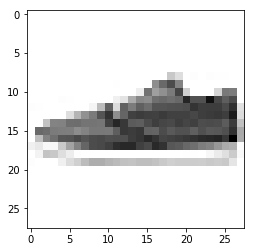

In [35]:
image_num = 60
predictions = model.predict(test_images)
image = test_images[image_num]
print("Predictions for image:", predictions[image_num])
label = np.argmax(predictions[image_num])
print(label)
plt.imshow(test_images[image_num], cmap=plt.cm.binary)

## Incrementally add random perturbation

In [36]:
max_perturb = 20 # This is maximum perturbation increase or decreased
num_iterations = 12

In [37]:
perturbed_images = np.empty((num_iterations,28,28), dtype='float64')
new_image = image
perturbed_images[0] = new_image
for i in range(num_iterations-1):
    r = np.random.RandomState(i)
    new_image_unclipped = new_image + (r.randint(-(max_perturb+1), max_perturb+1, size=(28,28)))/255
    # Clip the image so that it doesn't include pixel values outside 0 and 255
    new_image = np.clip(new_image_unclipped, 0, 1)
    perturbed_images[i+1] = new_image

In [38]:
perturbed_predictions = model.predict(perturbed_images)

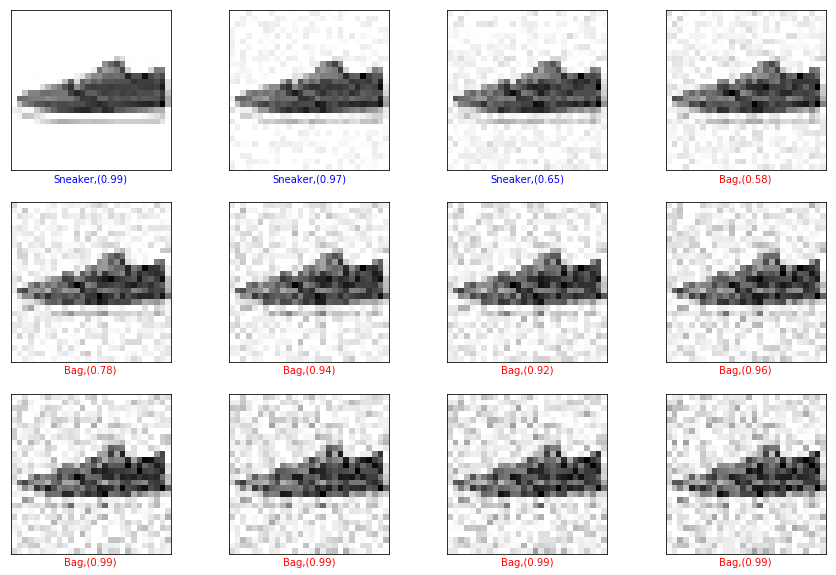

In [39]:
plt.figure(figsize=(15, 10))
for i in range(num_iterations):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(perturbed_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(perturbed_predictions[i])
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{},({:.2f})".format(class_names[predicted_label],
                                    perturbed_predictions[i][predicted_label]),
                                    color=color)  

Try changing the image number to a different classification. You'll see that some images are far more difficult to mis-classify than others.

Bags are particularly difficult to misclassify because they appear to be the "default" that the model has learned. 

## Where next?

Take a look at a examples of proper attacks on the Fashion-MNIST dataset. For example:

* The Foolbox gradient attack (white box). Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/fashionMNIST_foolbox_gradient.ipynb) and here's the [relative path to the Jypyter notebook](./fashionMNIST_foolbox_gradient.ipynb) if you want to run it.

* The Foolbox boundary attack (black-box). Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/fashionMNIST_foolbox_boundary.ipynb) and here's the [relative path to the Jypyter notebook](./fashionMNIST_foolbox_boundary.ipynb) if you want to run it.

Want to move on to more complicated images, try:

* The Foolbox naive (random) attack using the ResNet50 classifier. Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/resnet50_naive.ipynb) and here's the [relative path to the Jypyter notebook](./resnet50_naive.ipynb) if you want to run it.

* The Foolbox saliency attack using the ResNet50 classifier. Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/resnet50_foolbox_saliency.ipynb) and here's the [relative path to the Jypyter notebook](./resnet50_foolbox_saliency.ipynb) if you want to run it.

There are many more examples of adversarial attacks online. See [RESOURCES.md](https://github.com/katywarr/strengthening-dnns/blob/master/RESOURCES.md) for links to collaborative projects for creating and defending against attacks.